![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Travailler avec des données ouvertes Partie 3 - La loterie

## Introduction
Ce cahier démontre certaines compétences de manipulation de données plus complexes. Cette fois, nous utiliserons un ensemble de données des numéros gagnants historiques de la loterie.

## L'ensemble de données

Nous utiliserons les données historiques Lotto 649 hébergées sur le site Web Lotto 649 [à ce lien](http://www.lotto649stats.com/recent_winning.html). Si vous choisissez de suivre ce lien, vous vous retrouverez avec une table qui ressemble à celle ci-dessous

![winning lottery numbers](images/lotto.png)

Ce qui est fantastique, il y a toutes les données là. Cependant, la question demeure: comment allons-nous extraire ces données du site Web dans un format qui fonctionnera bien pour nous? Une autre prise, qui n'est pas évidente à partir de la capture d'écran, est qu'il s'agit d'un tableau incomplète. Plusieurs autres tableaux des années précédentes sont disponibles. Comme il s'agit de données ouvertes, nous sommes libres de parcourir ce site Web (manuellement ou avec un ordinateur) et de copier ces données nous-mêmes. Cependant, cela pourrait prendre beaucoup plus de temps que cela en vaut la peine, alors nous devrions hésiter à commencer notre analyse à partir d'ici.

Il s'avère que quelqu'un d'autre a déjà pris la peine de saisir les données depuis une trentaine d'années et de les intégrer dans un format facile à utiliser. Ces données sont disponibles [at this link](https://www.kaggle.com/datascienceai/lottery-dataset). Malheureusement, ceci est un exemple de "données semi-ouvertes". Vous êtes libre de le télécharger sans restriction, mais vous devez vous inscrire pour accéder au site Web. Heureusement, nous avons déjà fait ces efforts pour vous et nous chargeons simplement une copie locale enregistrée séparément. Vous trouverez ci-dessous quelques lignes de code qui devraient sembler familières du cahier précédent.

In [2]:
# Import our data manipulation library
import pandas as pd 
import matplotlib.pyplot as plt
# So any plots we want will appear in the notebook
%matplotlib inline

In [3]:
# Here we're loading the data set, here the 'pd' prefix tells us that 'read_csv' is a method
# coming from the pandas library
lottery = pd.read_csv("data/649.csv")

# This is to show us how many rows in our table we will have, 'len' stands for length
print('Total number of lotteries played:', len(lottery))

# This is to just look at the first five rows of the data set and keep the 
# notebook a little cleaner. 
lottery.head()

Total number of lotteries played: 3665


PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  DRAW DATE  NUMBER DRAWN 1  \
0      649            1                0  6/12/1982               3   
1      649            2                0  6/19/1982               8   
2      649            3                0  6/26/1982               1   
3      649            4                0   7/3/1982               3   
4      649            5                0  7/10/1982               5   

   NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  NUMBER DRAWN 5  \
0              11              12              14              41   
1              33              36              37              39   
2               6              23              24              27   
3               9              10              13              20   
4              14              21              31              34   

   NUMBER DRAWN 6  BONUS NUMBER  
0              43            13  
1              41             9  
2              39            34  
3              43            34  
4              47            45

Le tableau ci-dessus est constitué des cinq premières lignes de notre tableau qui contient des entrées pour 3665 loteries distinctes. C'est beaucoup de prix! Une première question naturelle à poser à propos de ces données est "est-ce que certains nombres sont plus populaires que d’autres?". S'il y a un préférence pour certains numéros par rapport à d'autres, nous aimerions plutôt jouer ces numéros!

Un bon moyen d’essayer est de compter le nombre de fois que chaque numéro apparaît. Par exemple, combien de 1, 2, 3 ... etc. ont été dessinés tout au long de la vie de cet ensemble de données. Passons en revue les étapes à suivre. Commençons par créer un nouveau tableau de données contenant uniquement les données numériques.

In [4]:
# First we define a list of the column names (seen in the table above) that we are interested in in order
# to count up their entries. 
cols = ['NUMBER DRAWN 1','NUMBER DRAWN 2','NUMBER DRAWN 3',
        'NUMBER DRAWN 4','NUMBER DRAWN 5','NUMBER DRAWN 6']

# By passing the list we've defined above, we return only those columns. We then assign those columns
# to a new dataframe called 'numbers'
numbers = lottery[cols]

numbers.head()

NUMBER DRAWN 1  NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  \
0               3              11              12              14   
1               8              33              36              37   
2               1               6              23              24   
3               3               9              10              13   
4               5              14              21              31   

   NUMBER DRAWN 5  NUMBER DRAWN 6  
0              41              43  
1              39              41  
2              27              39  
3              20              43  
4              34              47

Maintenant que nous avons isolé les nombres d'intérêt, il suffit de compter toutes les occurrences de chaque nombre. Avant de pouvoir faire cela, nous devons d'abord introduire une autre fonctionnalité Python / pandas: la fonction `apply()`.

---
### Digression: Comprendre Apply ()

Apply est une fonction de python / pandas qui vous permet "d'appliquer" une autre fonction ou transfomation facilement à une grande quantité de données. Dans notre cas, considérez-le comme un outil que nous utilisons pour manipuler toutes les données de notre cadre à la fois. Ci-dessous, nous travaillons sur un exemple de la façon Apply fonctionne en montrant comment nous pouvons l'utiliser pour faire quelque chose de faussement simple: ajoutez-en une à chaque entrée d'une trame de données.

In [5]:
'''
Here we're creating a new dataframe and filling it with zeroes. 

The first argument is the values to fill (here just zero everywhere) 
index is a list of labels for the row indexes, here just zero through five,
and columns is the column names, again zero through five 
'''

example = pd.DataFrame(0, index=[0,1,2,3,4,5], columns=[0,1,2,3,4,5])
example

0  1  2  3  4  5
0  0  0  0  0  0  0
1  0  0  0  0  0  0
2  0  0  0  0  0  0
3  0  0  0  0  0  0
4  0  0  0  0  0  0
5  0  0  0  0  0  0

In [6]:
'''
Now we're going through defining a function, a process which we need to introduce. 

1. Here the 'def' keyword can be thought of to mean "define"

2. 'add_one' is the name we've given to the function that we're defining. This choice is 
    arbitrary and we could have named it anything we wanted. However, it's often helpful 
    to name a function in a way that is meaningful to help describe the purpose of the function.
    
3. 'x' in parenthesis is the name we're assigning to the variable that our function will be 
   taking as input 
   
4. output is the name that we're giving to a variable internal to our function to make calculations

5. return is the keyword that tells our function to return that value once it's been called

6. Notice the consistent indentation after 'def', this is how python knows that the lines of code 
   underneath def are a part of the function 


'''

# This function will take a number x as input, and return that value plus one 
def add_one(x):
    output = x + 1
    return output

# Here we're testing it for expected behavior: Does it indeed 
# return the original number plus one? 
add_one(10)

11

Maintenant que nous avons défini une trame de données "test" et une fonction qui en ajoutera un à n'importe quelle entrée, nous démontrerons ce que la méthode `apply()` fera à une trame de données.

In [9]:
'''
Notice how we're not supplying any arguments to our add_one function, that is because 
the arguments will be supplied from the contents of the dataframe 'example' itself!
'''
example.apply(add_one)

0  1  2  3  4  5
0  1  1  1  1  1  1
1  1  1  1  1  1  1
2  1  1  1  1  1  1
3  1  1  1  1  1  1
4  1  1  1  1  1  1
5  1  1  1  1  1  1

Remarquez comment nous avons ajouté un à chaque entrée de notre trame de données en une seule ligne de code! Pour nos besoins, `apply()` peut être considéré comme une méthode qui 'applique' une fonction à notre trame de données. La fonctionnalité de `apply()` s'étend bien au-delà. Pour nos besoins, cela devrait être suffisant de comprendre les sections suivantes.


---


### De retour aux affaires

Nous allons maintenant montrer comment utiliser `apply()` pour compter combien de fois chaque nombre est apparu dans la loterie. Nous allons utiliser une fonction de pandas interne, similaire à une fonction Excel telle que `SUM`,` AVERAGE`, `MEAN`, etc. Dans notre cas, nous allons utiliser `pd.value_counts`. Le préfixe `pd` spécifie qu'il s'agit d'une fonction pandas, et `value_counts` est le nom de la fonction que nous utilisons. Ce que `value_counts` fait est elle renvoie un objet de trame de données séparé des nombres de toutes les valeurs uniques. Voyons comment l'utiliser avec apply pour compter les fréquences des numéros de loterie ci-dessous.

In [7]:
"""
Here the function we're passing to "apply" is pd.value_counts. This is a pandas function
that counts the occurences of unique entries, in this case in the data frame. This is the perfect function
to count how many times each number has been drawn in the lottery!
"""

numbers.apply(pd.value_counts)

NUMBER DRAWN 1  NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  \
1            423.0             NaN             NaN             NaN   
2            390.0            47.0             NaN             NaN   
3            348.0            92.0             3.0             NaN   
4            347.0            98.0             6.0             2.0   
5            261.0           152.0            15.0             NaN   
6            238.0           149.0            41.0             1.0   
7            227.0           181.0            50.0             3.0   
8            189.0           189.0            57.0            11.0   
9            194.0           178.0            68.0            15.0   
10           152.0           183.0            75.0            19.0   
11           142.0           164.0            89.0            26.0   
12           127.0           194.0           103.0            25.0   
13           100.0           178.0           111.0            26.0   
14            72.0           172.0           114.0            36.0   
15            68.0           178.0           132.0            47.0   
16            69.0           159.0           141.0            61.0   
17            53.0           162.0           154.0            58.0   
18            52.0           127.0           149.0            79.0   
19            41.0           129.0           163.0            81.0   
20            42.0           133.0           164.0           108.0   
21            28.0           125.0           164.0            97.0   
22            17.0            96.0           177.0           109.0   
23            26.0            82.0           168.0           132.0   
24            13.0            84.0           161.0           118.0   
25             6.0            62.0           158.0           135.0   
26            11.0            67.0           134.0           160.0   
27            10.0            50.0           126.0           173.0   
28             6.0            43.0           115.0           159.0   
29             4.0            49.0           127.0           148.0   
30             4.0            40.0           100.0           160.0   
31             2.0            21.0            99.0           200.0   
32             1.0            26.0            93.0           163.0   
33             1.0            13.0            84.0           164.0   
34             NaN            11.0            70.0           171.0   
35             NaN            11.0            51.0           130.0   
36             NaN             4.0            59.0           144.0   
37             NaN             4.0            37.0           122.0   
38             1.0             3.0            28.0           119.0   
39             NaN             3.0            21.0           106.0   
40             NaN             3.0            26.0           106.0   
41             NaN             1.0            18.0            78.0   
42             NaN             1.0             6.0            59.0   
43             NaN             1.0             5.0            48.0   
44             NaN             NaN             2.0            28.0   
45             NaN             NaN             1.0            21.0   
46             NaN             NaN             NaN            13.0   
47             NaN             NaN             NaN             4.0   
48             NaN             NaN             NaN             NaN   
49             NaN             NaN             NaN             NaN   

    NUMBER DRAWN 5  NUMBER DRAWN 6  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN  
5              NaN             NaN  
6              NaN             NaN  
7              NaN             NaN  
8              NaN             NaN  
9              NaN             NaN  
10             NaN             NaN  
11             2.0             NaN  
12             3.0             NaN  
13             6.0    

Là où dans le tableau ci-dessus, nous pouvons voir combien de fois chaque nombre a été compté et dans quelle position! Cela peut également représenter un bon exemple de cas où des données parfaitement correctes peuvent sembler trompeuses. Pourquoi est-ce que beaucoup de ces valeurs de `NaN` apparaissent à nouveau? Eh bien, la réponse est assez simple. Comme ces valeurs sont triées par ordre croissant dans chaque ligne, nous constatons que certains numéros ne peuvent pas apparaître dans certaines positions. Par exemple, en raison du tri, le nombre 1-5 ne peut _jamais_ être présent dans la 6$^{\text{e}}$ colonne.

Un tableau de données est merveilleux, mais il est beaucoup plus facile de communiquer quelque chose comme un compte de fréquence sous forme d'histogramme. Cependant, nous devons d'abord additionner le nombre de fois où chaque nombre a été compté! Dans Excel, une telle affaire serait assez simple; Tapez simplement `SUM`, faites glisser une sélection de lignes, puis faites glisser cette cellule sur le côté. Facile! Ici, nous allons voir que c'est aussi facile, peut-être même plus facile en utilisant pandas.

In [14]:
'''
Here we first create a new data frame 'counts' which is the dataframe we created before

We then create a new  "sum_column" in our data frame, and filling it with the sum of each 
row in our data frame. The sum of each row is specified by the 'axis=1' argument.
'''

counts = numbers.apply(pd.value_counts)

# Create a new column in our counts data frame called "sum_column"
counts["sum_column"] = counts.sum(axis=1)

counts

NUMBER DRAWN 1  NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  \
1            423.0             NaN             NaN             NaN   
2            390.0            47.0             NaN             NaN   
3            348.0            92.0             3.0             NaN   
4            347.0            98.0             6.0             2.0   
5            261.0           152.0            15.0             NaN   
6            238.0           149.0            41.0             1.0   
7            227.0           181.0            50.0             3.0   
8            189.0           189.0            57.0            11.0   
9            194.0           178.0            68.0            15.0   
10           152.0           183.0            75.0            19.0   
11           142.0           164.0            89.0            26.0   
12           127.0           194.0           103.0            25.0   
13           100.0           178.0           111.0            26.0   
14            72.0           172.0           114.0            36.0   
15            68.0           178.0           132.0            47.0   
16            69.0           159.0           141.0            61.0   
17            53.0           162.0           154.0            58.0   
18            52.0           127.0           149.0            79.0   
19            41.0           129.0           163.0            81.0   
20            42.0           133.0           164.0           108.0   
21            28.0           125.0           164.0            97.0   
22            17.0            96.0           177.0           109.0   
23            26.0            82.0           168.0           132.0   
24            13.0            84.0           161.0           118.0   
25             6.0            62.0           158.0           135.0   
26            11.0            67.0           134.0           160.0   
27            10.0            50.0           126.0           173.0   
28             6.0            43.0           115.0           159.0   
29             4.0            49.0           127.0           148.0   
30             4.0            40.0           100.0           160.0   
31             2.0            21.0            99.0           200.0   
32             1.0            26.0            93.0           163.0   
33             1.0            13.0            84.0           164.0   
34             NaN            11.0            70.0           171.0   
35             NaN            11.0            51.0           130.0   
36             NaN             4.0            59.0           144.0   
37             NaN             4.0            37.0           122.0   
38             1.0             3.0            28.0           119.0   
39             NaN             3.0            21.0           106.0   
40             NaN             3.0            26.0           106.0   
41             NaN             1.0            18.0            78.0   
42             NaN             1.0             6.0            59.0   
43             NaN             1.0             5.0            48.0   
44             NaN             NaN             2.0            28.0   
45             NaN             NaN             1.0            21.0   
46             NaN             NaN             NaN            13.0   
47             NaN             NaN             NaN             4.0   
48             NaN             NaN             NaN             NaN   
49             NaN             NaN             NaN             NaN   

    NUMBER DRAWN 5  NUMBER DRAWN 6  sum_column  
1              NaN             NaN       423.0  
2              NaN             NaN       437.0  
3              NaN             NaN       443.0  
4              NaN             NaN       453.0  
5              NaN             NaN       428.0  
6              NaN             NaN       429.0  
7              NaN             NaN       461.0  
8              NaN             NaN       446.0  
9              NaN             NaN       455.0  
10           

L'action ci-dessus a ajouté une nouvelle colonne qui représente la somme des données contenues dans chaque ligne. Notez que les entrées `NaN` ne sont pas comptées dans le total numérique de notre colonne de somme (plus facile à voir dans la première ou la dernière ligne). Maintenant que nous avons une colonne pratique, visualisons enfin le nombre de comptes que nous avons.

Text(0.5,1,'Number Frequencies of Lotto 649')

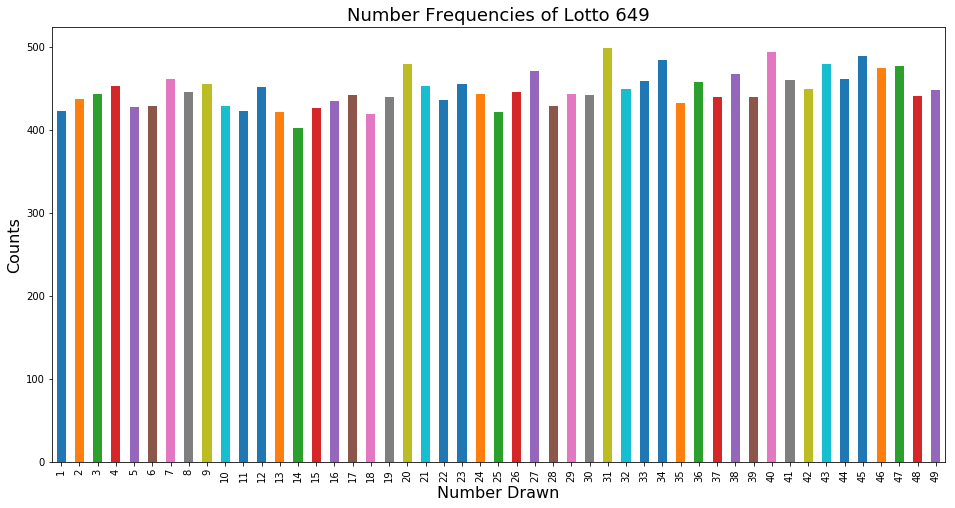

In [22]:
'''
Here we're simply making a plot of the number frequencies that we counted in the previous step.

'''

counts['sum_column'].plot(kind = 'bar', figsize = (16,8))
plt.xlabel("Number Drawn", size = 16)
plt.ylabel("Counts", size = 16)
plt.title("Number Frequencies of Lotto 649", size = 18)

D'après la figure ci-dessus, il est clair qu'il n'y a pas nécessairement une distribution _uniforme_ des numéros de loterie. Bien sûr, la question demeure; y a-t-il des numéros _plus susceptibles_ d'être tirés à la loterie que d'autres? Si tel était le cas, il serait préférable de choisir ces numéros à la place.

Maintenant, dans le cadre de l'ensemble du cahier, il semble que nous ayons beaucoup travaillé pour créer le graphique ci-dessus. C'est tout le contraire! Dans la cellule ci-dessous, nous avons répété tout le code nécessaire pour charger l'ensemble de données jusqu'à la création de l'histogramme de fréquence du Loto 649. En fait, en ignorant les espaces et les commentaires, seulement dix lignes de code sont nécessaires de passer du chargement des données à la création d'un graphique formaté.

In [44]:
# Below is all the code required to create the histogram of Lotto 649 number draws 
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading/wrangling
lottery = pd.read_csv("data/649.csv")

cols = ['NUMBER DRAWN 1','NUMBER DRAWN 2','NUMBER DRAWN 3',
        'NUMBER DRAWN 4','NUMBER DRAWN 5','NUMBER DRAWN 6']
numbers = lottery[cols]

counts = numbers.apply(pd.value_counts)
counts["sum_column"] = counts.sum(axis=1)

# To create the plot again remove the '#' and trailing space from the four lines
# below. 

# counts['sum_column'].plot(kind = 'bar', figsize = (16,8))
# plt.xlabel("Number Drawn", size = 16)
# plt.ylabel("Counts", size = 16)
# plt.title("Number Frequencies of Lotto 649", size = 18)

## Conclusion

Espérons que ce cahier a démystifié la façon d'intégrer des données ouvertes dans un cahier Jupyter. Nous avons démontré la simplicité relative du chargement des données dans une trame de données facile à utiliser, ensuite d'utiliser cette trame de données pour créer et visualiser directement des statistiques sommaires. Bien entendu, ce n’est que le début de toute analyse. Si vous voulez comprendre des "anomalies non aléatoires", vous devrez approfondir cette trame de données. Peut-être effectuer un test de hasard comme un test de chi carré ou de Kolmogorov-Smirnov. Vous essayerez de trouver des nombres qui semblent être "moins aléatoires" que les autres et les utiliser comme des choix favorables dans vos propres choix de loterie. Certes, il serait surprenant que la loterie soit sujette à des préférences, mais la découverte de ces possibilités est précisément le but de travailler avec des données ouvertes.


---

## Bonus

Vous trouverez ci-dessous une fonction appelée `lot` qui générera des numéros de loterie aléatoires pour vous. Si vous vous sentez aventureux, essayez de créer votre propre ensemble de données (simulé) de numéros de loterie. Vous pouvez utiliser cet ensemble de données synthétiques pour comparer et contraster avec les données réelles. Ou démarrer simplement la cellule plusieurs fois pour générer autant de combinaisons de numéros de loterie potentiels que vous le souhaitez.

In [6]:
import random
from IPython.display import clear_output
def lot(sort = True):
    # Create a list (the [] brackets) of your firstrandom lottery number
    choice = [float(random.randint(1,49))]
    
    # This is an infinite loop: be careful!
    while True:
        # Try to add a new number to our list provided it isn't already in 
        # our list
        new = float(random.randint(1,49))
        if new not in choice:
            # If it's a number we don't already have, add it to the list
            choice.append(new)
        
        # If we have 6 numbers, we can exit our infinite loop by returning
        # our lottery choices
        if len(choice) == 6:
            if sort:
                return sorted(choice)
            else:
                return choice

# This actually calls our function
lot()



[3.0, 5.0, 25.0, 29.0, 39.0, 47.0]

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)